<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-Information" data-toc-modified-id="General-Information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>General Information</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Machine-Learning-Models" data-toc-modified-id="Machine-Learning-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine Learning Models</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Decision-Tree-Classification" data-toc-modified-id="Decision-Tree-Classification-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree Classification</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#K-Nearest-Neighbors-(K-NN)" data-toc-modified-id="K-Nearest-Neighbors-(K-NN)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>K-Nearest Neighbors (K-NN)</a></span></li><li><span><a href="#Support-Vector-Machine-(SVM)" data-toc-modified-id="Support-Vector-Machine-(SVM)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Support Vector Machine (SVM)</a></span></li><li><span><a href="#Kernel-SVM" data-toc-modified-id="Kernel-SVM-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Kernel SVM</a></span></li></ul></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Comparison</a></span></li></ul></div>

# General Information

The 'Early Stage Diabetes Risk Prediction' dataset has been downloaded from the UCI open data repository: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

There are 520 rows. Each row represents the answers to the questions of the questionnaire of the person who participated in the survey.
The dataset consists of a total of 16 features and one target variable named 'class':
1. Age: Age in years ranging from (16 years to 90 years)
2. Gender: Male / Female
3. Polyuria (frequent urination): Yes / No
4. Polydipsia (excessive thirst): Yes/ No
5. Sudden weight loss: Yes/ No
6. Weakness: Yes/ No
7. Polyphagia (extreme hunger): Yes/ No
8. Genital Thrush: Yes/ No
9. Visual blurring: Yes/ No
10. Itching: Yes/ No
11. Irritability: Yes/No
12. Delayed healing: Yes/ No
13. Partial Paresis (weakening of a muscle or group of muscles): Yes/ No
14. Muscle stiffness: Yes/ No
15. Alopecia (hair loss): Yes/ No
16. Obesity: Yes/ No

Class: Positive / Negative

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#sns.set(style="whitegrid")
#sns.set_palette('coolwarm')
sns.set_palette('Set2')
from sklearn import metrics

In [2]:
dataset = pd.read_csv('diabetes_data_upload.csv')

In [3]:
dataset.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

In [4]:
dataset.shape

(520, 17)

In [5]:
#getting data types and checking for missing data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
#checking for missing data
dataset.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# Data Visualization

There are 320 Positive and 200 Negative cases in the dataset.

In [7]:
def f_p(x):
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

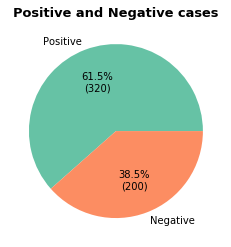

In [8]:
v_counts = dataset['class'].value_counts()
total = len(dataset['class'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=f_p);
plt.title('Positive and Negative cases', fontweight="bold", size = 13)
plt.show()

Age Distribution

In [9]:
#bins = [16, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 90]
#labels = ['-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
bins = [16, 24, 34, 44, 54, 64, 74, 90]
labels = ['-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
df_copy = dataset.copy()
df_copy['agerange'] = pd.cut(df_copy['Age'], bins, labels = labels,include_lowest = True)
df = df_copy.groupby(["agerange", "class"]).size()
#df = df.to_frame()
#df['Neg_pct'] = round(((df['Negative']/(df['Negative'].sum()))*100),1)
#df['Pos_pct'] = round(((df['Positive']/(df['Positive'].sum()))*100),1)
#a = a[['Neg_pct', 'Pos_pct']]
#df['agerange'] = df.index
#df = df.rename(columns={"0": "count"})
#out_df = pd.merge(dataset, df, how='left', on=['agerange', 'class'])
#out_df = out_df.rename(columns={0: "count"})
#out_df
a = df.unstack()
a['total'] = a['Negative'] + a['Positive']
a['neg_pct'] = round(((a['Negative']/a['total'])*100), 1)
a['pos_pct'] = round(((a['Positive']/a['total'])*100), 1)
a = a[['neg_pct', 'pos_pct']]

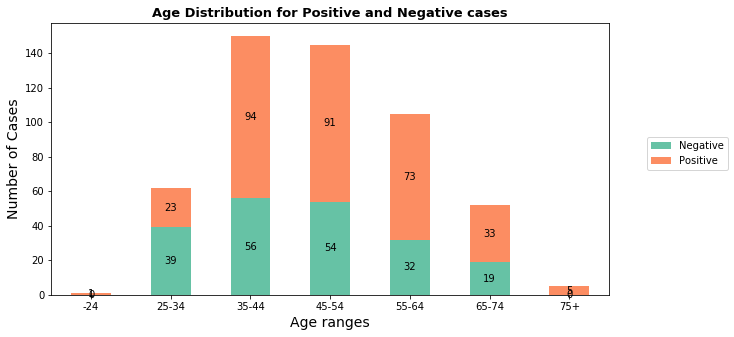

In [10]:
g = df.unstack().plot(kind="bar", stacked=True, figsize=(10, 5))
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set_title('Age Distribution for Positive and Negative cases', fontweight="bold", size = 13)
g.set_xlabel("Age ranges", fontsize=14)
plt.xticks(rotation=0)
g.set_ylabel("Number of Cases", fontsize=14)
g.legend(["Negative", "Positive"], bbox_to_anchor=(1.14, 0.6), loc='upper center')

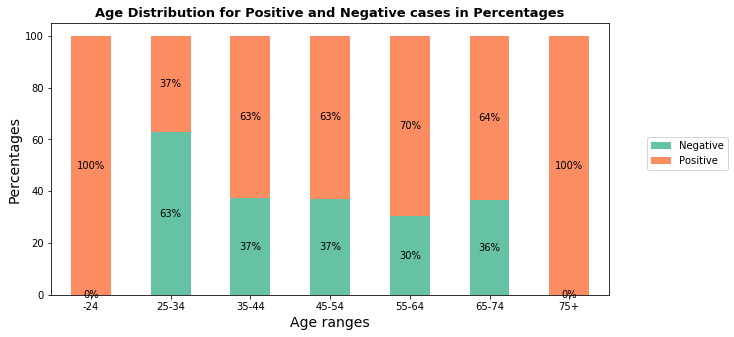

In [11]:
g = a.plot(kind="bar", stacked=True, figsize=(10, 5))
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set_title('Age Distribution for Positive and Negative cases in Percentages', fontweight="bold", size = 13)
g.set_xlabel("Age ranges", fontsize=14)
plt.xticks(rotation=0)
g.set_ylabel("Percentages", fontsize=14)
g.legend(["Negative", "Positive"], bbox_to_anchor=(1.14, 0.6), loc='upper center')

For 35 and older age groups, the share of Positive cases is higher than the share of Negative cases

Average Age: 48.03
Average Age for Positive cases: 49.07
Average Age for Negative cases: 46.36


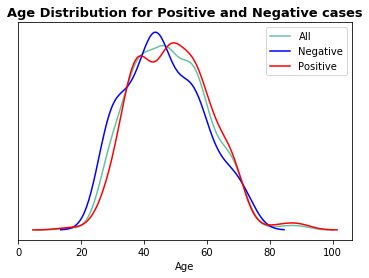

In [12]:
g = sns.kdeplot(dataset["Age"])
g = sns.kdeplot(dataset["Age"][(dataset["class"] == 'Negative')], color="Blue")
g = sns.kdeplot(dataset["Age"][(dataset["class"] == 'Positive')], ax =g, color="Red")
g.set_title('Age Distribution for Positive and Negative cases', fontweight="bold", size = 13)
g.axes.get_yaxis().set_visible(False)
g.set_xlabel("Age")
g = g.legend(["All", "Negative","Positive"])

df_pos=dataset[dataset['class']=='Positive']
df_neg=dataset[dataset['class']=='Negative']
print("Average Age:", round(dataset["Age"].mean(),2))
print("Average Age for Positive cases:", round(df_pos["Age"].mean(),2))
print("Average Age for Negative cases:", round(df_neg["Age"].mean(),2))

Gender Distribution

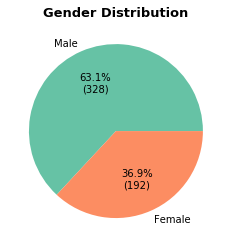

In [13]:
v_counts = dataset['Gender'].value_counts()
total = len(dataset['Gender'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=f_p);
plt.title('Gender Distribution', fontweight="bold", size = 13)
plt.show()

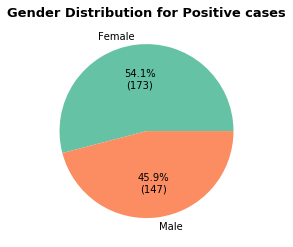

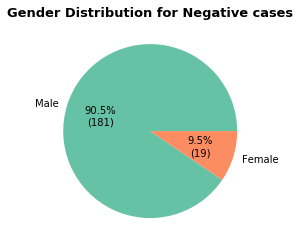

In [14]:
df_pos = dataset[dataset['class']=='Positive']
v_counts = df_pos['Gender'].value_counts()
total = len(df_pos['Gender'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=f_p);
plt.title('Gender Distribution for Positive cases', fontweight="bold", size = 13)
plt.show()

df_neg = dataset[dataset['class']=='Negative']
v_counts = df_neg['Gender'].value_counts()
total = len(df_neg['Gender'])
plt.pie(v_counts, labels=v_counts.index, autopct=f_p);
plt.title('Gender Distribution for Negative cases', fontweight="bold", size = 13)
plt.show()

Positive and Negative cases vs Gender

In [15]:
df_Gender = dataset.groupby(['class', 'Gender']).size().reset_index().pivot(columns='class', index='Gender', values=0).astype(float)
df_Gender1 = dataset.groupby(['Gender', 'class']).size().reset_index().pivot(columns='Gender', index='class', values=0).astype(float)
df_Gender2 = df_Gender1.copy()
df_Gender2['Female']['Negative'] = round((df_Gender['Negative']['Female']/df_Gender['Negative'].sum())*100, 2)
df_Gender2['Female']['Positive'] = round((df_Gender['Positive']['Female'] /df_Gender['Positive'].sum())*100, 2)
df_Gender2['Male']['Negative'] = round((df_Gender['Negative']['Male']/df_Gender['Negative'].sum())*100, 2)
df_Gender2['Male']['Positive'] = round((df_Gender['Positive']['Male'] /df_Gender['Positive'].sum())*100, 2)
print(df_Gender2)

Gender    Female   Male
class                  
Negative    9.50  90.50
Positive   54.06  45.94


54.06% of Positive cases are Female and 45.94% are Male, while 9.5% of Negative cases are Female and 90.5% are Male

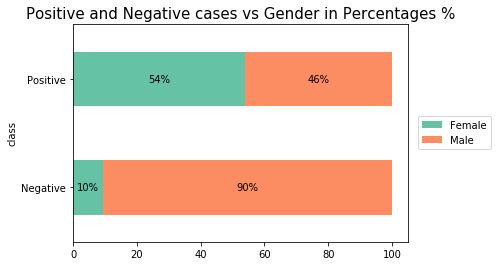

In [16]:
g1 = df_Gender2.plot.barh(stacked=True)
for p in g1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g1.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g1.legend(bbox_to_anchor=(1.14, 0.6), loc='upper center')
g1.set_title('Positive and Negative cases vs Gender in Percentages %', fontsize=15)
plt.show()

Distribution of Symptoms

In [17]:
df_symptoms = dataset[dataset.columns.difference(["Age", "class", "Gender"])]

agg_df = pd.DataFrame(columns = ('Symptom', 'Yes', 'No', 'Yes%', 'No%'))

for column in df_symptoms.columns:
    yes_no_dictionary = {}
    yes_no_dictionary[column] = {'Symptom':column, 
                                 'No':df_symptoms[df_symptoms[column] == 'No'].shape[0],
                                 'Yes':df_symptoms[df_symptoms[column] == 'Yes'].shape[0], 
                                 'No%':(round(df_symptoms[df_symptoms[column] == 'No'].shape[0]/df_symptoms.shape[0] * 100)),
                                 'Yes%':(round(df_symptoms[df_symptoms[column] == 'Yes'].shape[0]/df_symptoms.shape[0] * 100))}
    
    agg_df = agg_df.append(yes_no_dictionary[column], ignore_index=True)
agg_df=agg_df.sort_values(by=['Yes'])
agg_df_n = agg_df.drop(columns=['Yes%', 'No%']).set_index('Symptom')
agg_df_p = agg_df.drop(columns=['Yes', 'No']).set_index('Symptom')

Text(0.5, 1.0, 'Distribution of Symptoms in percentages')

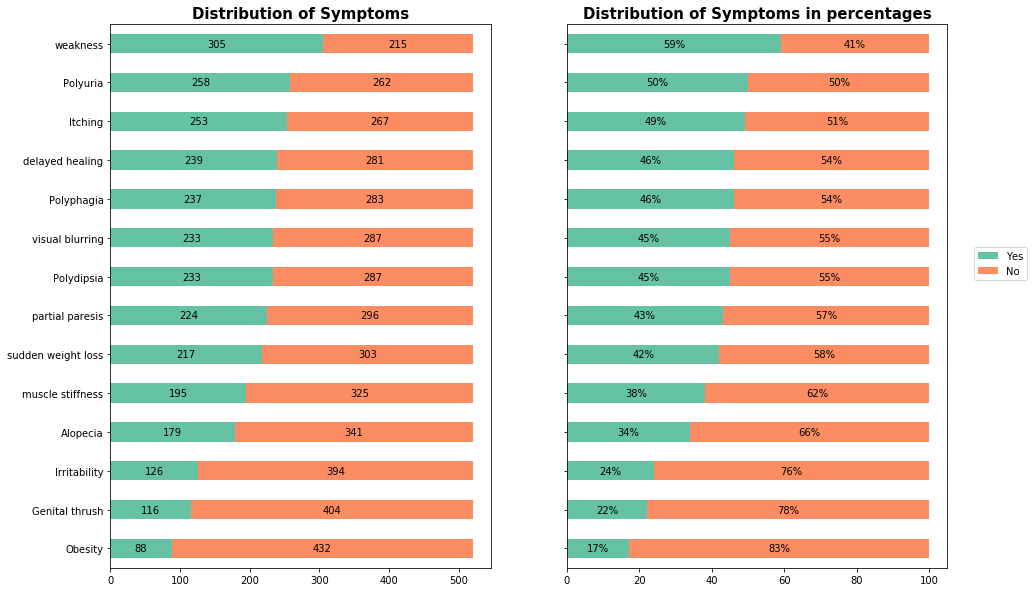

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

g = agg_df_n.plot.barh(stacked=True, ax=ax1)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(ylabel=None)
g.get_legend().remove()
g.set_title('Distribution of Symptoms', fontweight="bold", size = 15)

g = agg_df_p.plot.barh(stacked=True, ax=ax2)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(xlabel=None)
g.set(yticklabels=[])
g.set(ylabel=None)
g.legend(["Yes", "No"], bbox_to_anchor=(1.14, 0.6), loc='upper center')
g.set_title('Distribution of Symptoms in percentages', fontweight="bold", size = 15)

Text(0.5, 1.0, 'Distribution of Symptoms for Positive cases in percentages')

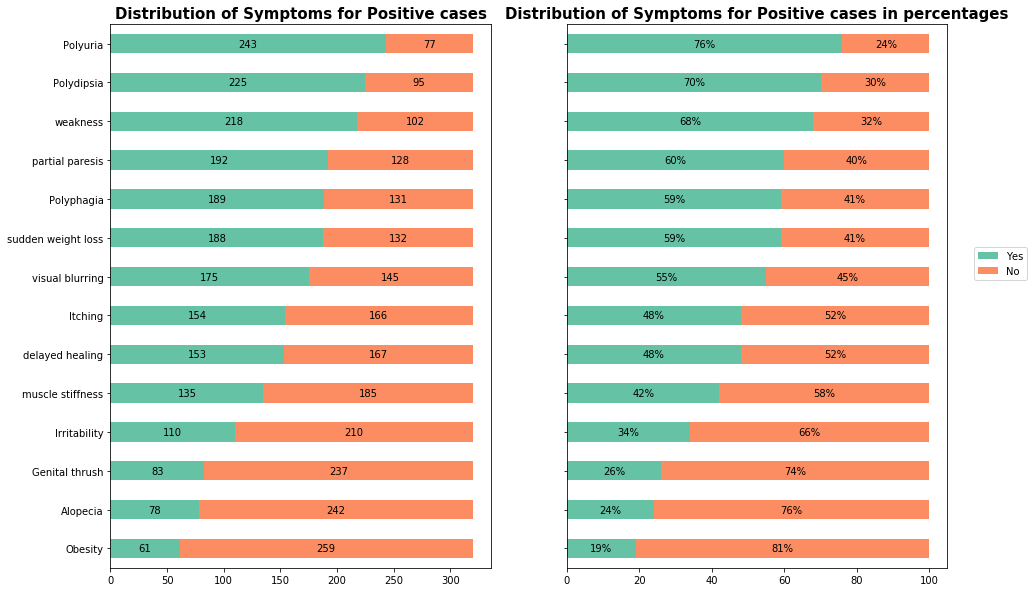

In [19]:
df_symptoms = df_pos[df_pos.columns.difference(["Age", "class", "Gender"])]

agg_df = pd.DataFrame(columns = ('Symptom', 'Yes', 'No', 'Yes%', 'No%'))

for column in df_symptoms.columns:
    yes_no_dictionary = {}
    yes_no_dictionary[column] = {'Symptom':column, 
                                 'No':df_symptoms[df_symptoms[column] == 'No'].shape[0],
                                 'Yes':df_symptoms[df_symptoms[column] == 'Yes'].shape[0], 
                                 'No%':(round(df_symptoms[df_symptoms[column] == 'No'].shape[0]/df_symptoms.shape[0] * 100)),
                                 'Yes%':(round(df_symptoms[df_symptoms[column] == 'Yes'].shape[0]/df_symptoms.shape[0] * 100))}
    
    agg_df = agg_df.append(yes_no_dictionary[column], ignore_index=True)
agg_df=agg_df.sort_values(by=['Yes'])
agg_df_n = agg_df.drop(columns=['Yes%', 'No%']).set_index('Symptom')
agg_df_p = agg_df.drop(columns=['Yes', 'No']).set_index('Symptom')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

g = agg_df_n.plot.barh(stacked=True, ax=ax1)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(ylabel=None)
g.get_legend().remove()
g.set_title('Distribution of Symptoms for Positive cases', fontweight="bold", size = 15)

g = agg_df_p.plot.barh(stacked=True, ax=ax2)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(xlabel=None)
g.set(yticklabels=[])
g.set(ylabel=None)
g.legend(["Yes", "No"], bbox_to_anchor=(1.14, 0.6), loc='upper center')
g.set_title('Distribution of Symptoms for Positive cases in percentages', fontweight="bold", size = 15)

Text(0.5, 1.0, 'Distribution of Symptoms for Negative cases in percentages')

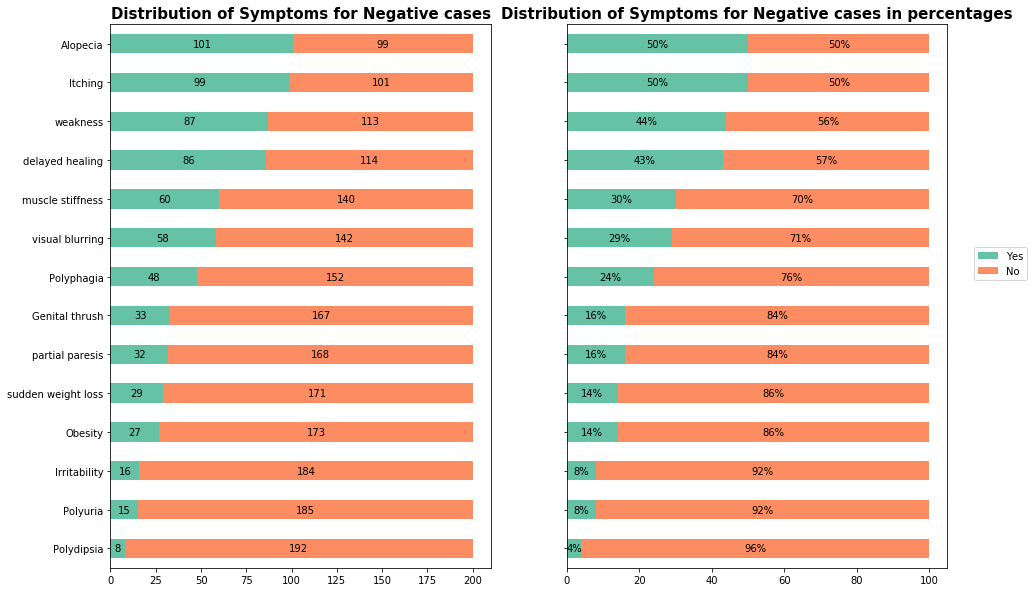

In [20]:
df_symptoms = df_neg[df_neg.columns.difference(["Age", "class", "Gender"])]

agg_df = pd.DataFrame(columns = ('Symptom', 'Yes', 'No', 'Yes%', 'No%'))

for column in df_symptoms.columns:
    yes_no_dictionary = {}
    yes_no_dictionary[column] = {'Symptom':column, 
                                 'No':df_symptoms[df_symptoms[column] == 'No'].shape[0],
                                 'Yes':df_symptoms[df_symptoms[column] == 'Yes'].shape[0], 
                                 'No%':(round(df_symptoms[df_symptoms[column] == 'No'].shape[0]/df_symptoms.shape[0] * 100)),
                                 'Yes%':(round(df_symptoms[df_symptoms[column] == 'Yes'].shape[0]/df_symptoms.shape[0] * 100))}
    
    agg_df = agg_df.append(yes_no_dictionary[column], ignore_index=True)
agg_df=agg_df.sort_values(by=['Yes'])
agg_df_n = agg_df.drop(columns=['Yes%', 'No%']).set_index('Symptom')
agg_df_p = agg_df.drop(columns=['Yes', 'No']).set_index('Symptom')

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

g = agg_df_n.plot.barh(stacked=True, ax=ax1)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(ylabel=None)
g.get_legend().remove()
g.set_title('Distribution of Symptoms for Negative cases', fontweight="bold", size = 15)

g = agg_df_p.plot.barh(stacked=True, ax=ax2)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(xlabel=None)
g.set(yticklabels=[])
g.set(ylabel=None)
g.legend(["Yes", "No"], bbox_to_anchor=(1.14, 0.6), loc='upper center')
g.set_title('Distribution of Symptoms for Negative cases in percentages', fontweight="bold", size = 15)

The most common sympthoms for all dataset are:
 - weakness 305 cases (59%)
 - Polyuria 258 cases (50%)
 - Itching 253 cases (49%)
 
<br>while for Postive cases the common symthoms are:
 - Polyuria 243 cases (76%)
 - Polydipsia 225 cases (70%)
 - weakness 218 cases (68%)
 
<br>and for Negative cases as follows:
 - Alopecia 101 cases (50%)
 - Itching 99 cases (50%)
 - weakness 87 cases (44%)

In [21]:
Yes_positive_dataset = pd.DataFrame(columns = ('Col_Name', 'Count', 'Pct'))
No_positive_dataset =  pd.DataFrame(columns = ('Col_Name', 'Count', 'Pct'))
Yes_negative_dataset = pd.DataFrame(columns = ('Col_Name', 'Count', 'Pct'))
No_negative_dataset =  pd.DataFrame(columns = ('Col_Name', 'Count', 'Pct'))

for column in df_pos.columns:
    Yes_positive_dictionary = {}
    No_positive_dictionary = {}
    Yes_positive_dictionary[column] = {'Col_Name':column, 
                                       'Count':df_pos[df_pos[column] == 'Yes'].shape[0], 
                                       'Pct':(round(df_pos[df_pos[column] == 'Yes'].shape[0]/df_pos.shape[0] * 100))}
    No_positive_dictionary[column] = {'Col_Name':column, 
                                       'Count':df_pos[df_pos[column] == 'No'].shape[0], 
                                       'Pct':(round(df_pos[df_pos[column] == 'No'].shape[0]/df_pos.shape[0] * 100))}
    Yes_positive_dataset = Yes_positive_dataset.append(Yes_positive_dictionary[column], ignore_index=True)
    No_positive_dataset = No_positive_dataset.append(No_positive_dictionary[column], ignore_index=True)

Yes_positive_dataset = Yes_positive_dataset.drop([0,1,16])
No_positive_dataset = No_positive_dataset.drop([0,1,16])

for column in df_pos.columns:
    Yes_negative_dictionary = {}
    No_negative_dictionary = {}
    Yes_negative_dictionary[column] = {'Col_Name':column, 
                                       'Count':df_neg[df_neg[column] == 'Yes'].shape[0], 
                                       'Pct':(round(df_neg[df_neg[column] == 'Yes'].shape[0]/df_neg.shape[0] * 100))}
    No_negative_dictionary[column] = {'Col_Name':column, 
                                       'Count':df_neg[df_neg[column] == 'No'].shape[0], 
                                       'Pct':(round(df_neg[df_neg[column] == 'No'].shape[0]/df_neg.shape[0] * 100))}
    Yes_negative_dataset = Yes_negative_dataset.append(Yes_negative_dictionary[column], ignore_index=True)
    No_negative_dataset = No_negative_dataset.append(No_negative_dictionary[column], ignore_index=True)

Yes_negative_dataset = Yes_negative_dataset.drop([0,1,16])
No_negative_dataset = No_negative_dataset.drop([0,1,16])

Yes_positive_dataset = Yes_positive_dataset.sort_values(by = ['Count'], ascending=True)
No_positive_dataset = No_positive_dataset.sort_values(by = ['Count'], ascending=True)
Yes_negative_dataset = Yes_negative_dataset.sort_values(by = ['Count'], ascending=True)
No_negative_dataset = No_negative_dataset.sort_values(by = ['Count'], ascending=True)

C:\Users\Sona\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


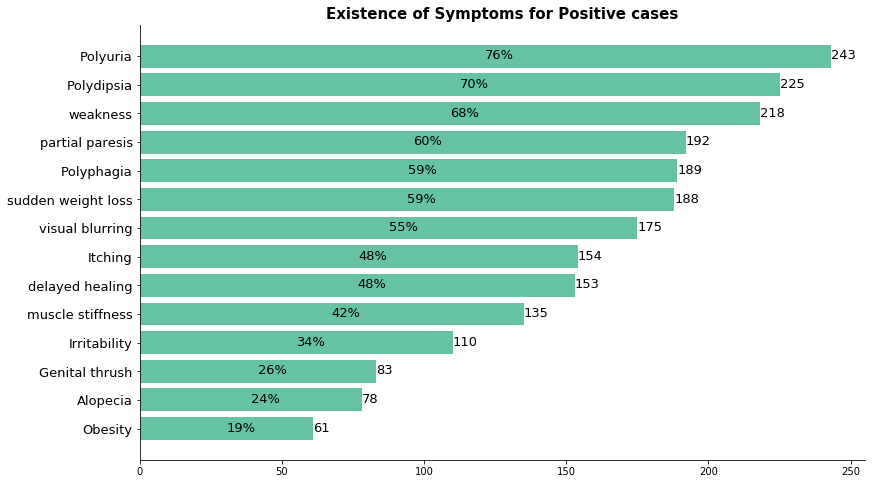

In [22]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(13)

ax = fig.add_subplot(111)

counts = Yes_positive_dataset['Count'].tolist()

# calculate percents
percents = Yes_positive_dataset['Pct'].tolist()

y_ax = Yes_positive_dataset['Col_Name']
y_tick = np.arange(len(y_ax))

ax.barh(range(len(counts)), counts, align = "center")
ax.set_yticks(y_tick)
ax.set_yticklabels(y_ax, size = 13)
ax.set_title('Existence of Symptoms for Positive cases', fontweight="bold", size = 15)

#annotate bar plot with values
for i, p in enumerate(ax.patches):
    label_per = percents[i]
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width, y+height/2-0.1, str(round((p.get_width()), 1)), fontsize=13)
    # add the percent label here
    # ax.text(y.get_width()+.09, y.get_y()+.3, str(round((label_per), 2)), ha='right', va='center', fontsize=10)
    ax.text(x+width/2, y+height/2-0.1, str(f'{round((label_per), 2)}%'), fontsize=13)

sns.despine()
plt.show();

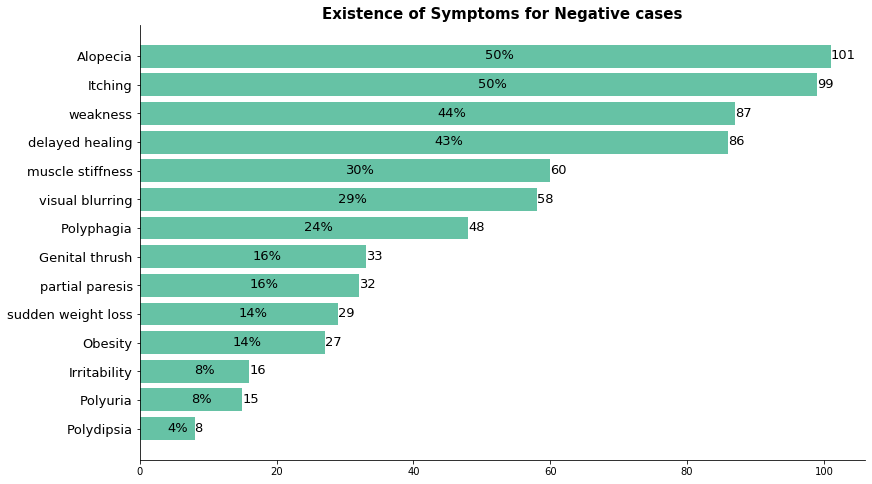

In [23]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(13)

ax = fig.add_subplot(111)

counts = Yes_negative_dataset['Count'].tolist()

# calculate percents
percents = Yes_negative_dataset['Pct'].tolist()

y_ax = Yes_negative_dataset['Col_Name']
y_tick = np.arange(len(y_ax))

ax.barh(range(len(counts)), counts, align = "center")
ax.set_yticks(y_tick)
ax.set_yticklabels(y_ax, size = 13)
ax.set_title('Existence of Symptoms for Negative cases', fontweight="bold", size = 15)

#annotate bar plot with values
for i, p in enumerate(ax.patches):
    label_per = percents[i]
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width, y+height/2-0.1, str(round((p.get_width()), 1)), fontsize=13)
    # add the percent label here
    # ax.text(y.get_width()+.09, y.get_y()+.3, str(round((label_per), 2)), ha='right', va='center', fontsize=10)
    ax.text(x+width/2, y+height/2-0.1, str(f'{round((label_per), 2)}%'), fontsize=13)

sns.despine()
plt.show();

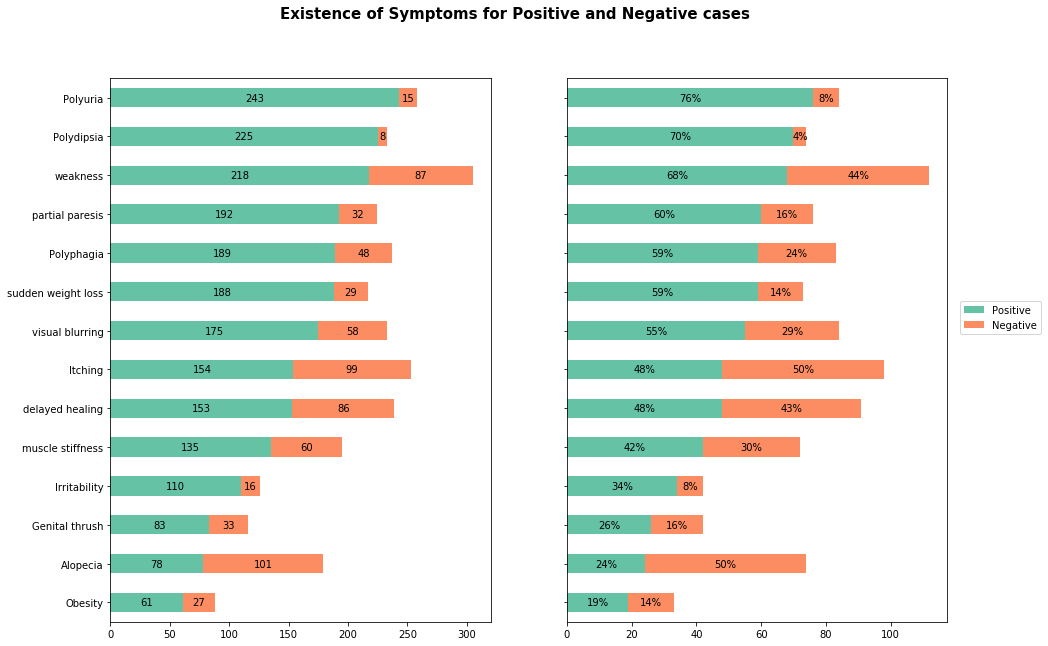

In [24]:
df1 = Yes_positive_dataset.rename(columns={"Count": "Count_yes", "Pct": "Pct_yes"}).set_index('Col_Name')
df2 = Yes_negative_dataset.rename(columns={"Count": "Count_no", "Pct": "Pct_no"}).set_index('Col_Name')
df3 = pd.merge(df1, df2, how='inner', on='Col_Name')
df3_count = df3.drop(columns=['Pct_yes', 'Pct_no']).sort_values(by = ['Count_yes'], ascending=True)
df3_pct = df3.drop(columns=['Count_yes', 'Count_no']).sort_values(by = ['Pct_yes'], ascending=True)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
fig.suptitle("Existence of Symptoms for Positive and Negative cases", fontweight="bold", size = 15)

g = df3_count.plot.barh(stacked=True, ax=ax1)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(ylabel=None)
g.get_legend().remove()
#g.set_title('Existence of Symptoms for Positive and Negative cases', fontweight="bold", size = 15)

g = df3_pct.plot.barh(stacked=True, ax=ax2)
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
g.set(xlabel=None)
g.set(yticklabels=[])
g.set(ylabel=None)
g.legend(["Positive", "Negative"],bbox_to_anchor=(1.14, 0.6), loc='upper center')
#g.set_title('Existence of Symptoms for Positive and Negative cases in percentages', fontweight="bold", size = 15)

The existence of Polyuria (76%) and Polydipsia (70%) is much higher for Positive cases than for Negative ones (8% and 4% respectively), whereas Weakness is common for both (Positive: 68% and Negative: 44%). Other common symptoms, which are more common for Positive cases, comparing with Negative ones, are partial paresis, Polyghagia, and sudden weight loss.

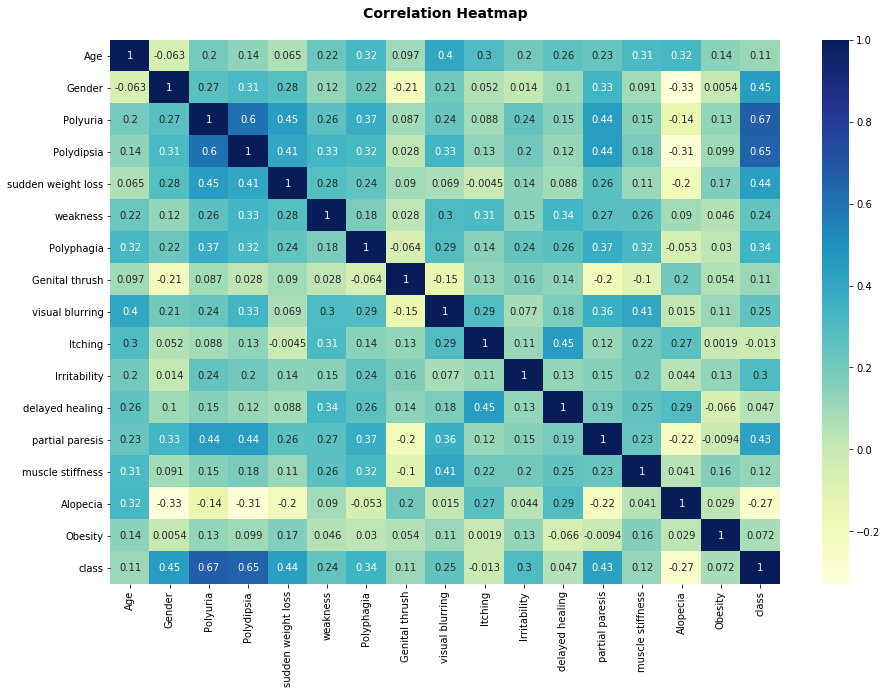

In [25]:
df = dataset.copy()
df['Gender'] = dataset['Gender'].map({'Female':1,'Male':0})
df['class']=dataset['class'].replace({'Positive':1,'Negative':0})
for col in dataset.columns:
    if col not in ["Age","Gender","class"]:
        df[col]=dataset[col].replace({'Yes':1,'No':0})
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

There is a correlation between Polyuria and class, Polydipsia and class (the target variable). Also, Polyuria and Polydipsia correlated with each other.

# Machine Learning Models

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
print(X)

[[40  0  0 ...  1  1  1]
 [58  0  0 ...  0  1  0]
 [41  0  1 ...  1  1  0]
 ...
 [58  1  1 ...  1  0  1]
 [32  1  0 ...  0  1  0]
 [42  0  0 ...  0  0  0]]


In [28]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 0 0 0 0 0 

Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [30]:
print(X_train)

[[28  0  0 ...  0  0  0]
 [40  1  1 ...  1  0  0]
 [61  1  1 ...  0  1  0]
 ...
 [65  1  0 ...  0  0  0]
 [26  0  0 ...  0  0  0]
 [63  0  1 ...  1  1  1]]


In [31]:
print(X_test)

[[45  0  0 ...  0  0  0]
 [47  0  0 ...  0  1  0]
 [56  0  0 ...  1  1  0]
 ...
 [57  0  1 ...  0  0  0]
 [35  0  1 ...  0  1  0]
 [38  0  1 ...  1  0  0]]


In [32]:
print(y_train)

[0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1
 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0
 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 1 1 1 0 1]


In [33]:
print(y_test)

[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1]


## Naive Bayes

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [37]:
proba_df = pd.DataFrame(columns=['Naive Bayes', 'Decision Tree Classification', 'Random Forest Classifier', 'XGBoost', 'Logistic Regression', 'K-Nearest Neighbors (K-NN)', 'Support Vector Machine (SVM)', 'Kernel (SVM)'])

In [38]:
proba_df['Naive Bayes'] = pd.Series(y_pred_proba[:,1])

In [39]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Model Performance: Naive Bayes \nAccuracy: %.2f' % round(100*accuracy,2) +'%')
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % round(100*precision, 2), '%')
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %.2f' % round(100*recall, 2), '%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %.2f' % round(100*f1, 2), '%')
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Model Performance: Naive Bayes 
Accuracy: 89.42%
Precision: 91.04 %
Recall: 92.42 %
F1 score: 91.73 %
[[32  6]
 [ 5 61]]


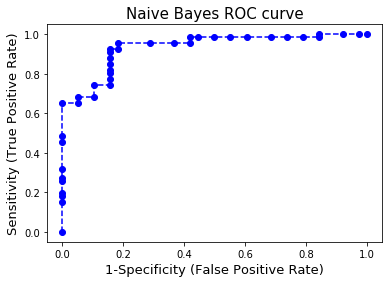

In [40]:
fpr, tpr, thresh = metrics.roc_curve(y_test, pd.Series(y_pred_proba[:,1]))
plt.plot(fpr,tpr,label="Naive Bayes", color='b', linestyle='--', marker='o',
     markerfacecolor='b', markersize=6)

plt.xlabel('1-Specificity (False Positive Rate)', fontsize=13)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=13)
plt.title('Naive Bayes ROC curve', fontsize=15)
plt.show()

In [41]:
results_df = pd.DataFrame(columns=['Model','Accuracy %','Precision %','Recall %','F1 score %'])

In [42]:
results = ['Naive Bayes', round(100*accuracy, 2), round(100*precision, 2), round(100*recall, 2), round(100*f1, 2)]
results = pd.Series(results, index = results_df.columns)
results_df = results_df.append(results, ignore_index=True)

## Decision Tree Classification

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [44]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [45]:
proba_df['Decision Tree Classification'] = pd.Series(y_pred_proba[:,1])

In [46]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Model Performance: Decision Tree Classification \nAccuracy: %.2f' % round(100*accuracy,2) + '%')
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % round(100*precision, 2) + '%')
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %.2f' % round(100*recall, 2) + '%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %.2f' % round(100*f1, 2) + '%')
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Model Performance: Decision Tree Classification 
Accuracy: 91.35%
Precision: 96.72%
Recall: 89.39%
F1 score: 92.91%
[[36  2]
 [ 7 59]]


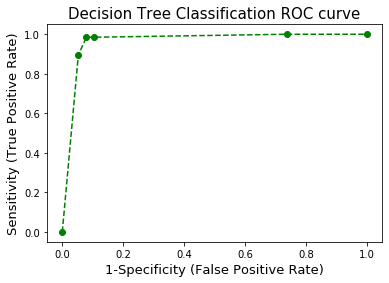

In [47]:
fpr, tpr, thresh = metrics.roc_curve(y_test, pd.Series(y_pred_proba[:,1]))
plt.plot(fpr,tpr,label="Decision Tree Classification", color='g', linestyle='--', marker='o',
     markerfacecolor='g', markersize=6)

plt.xlabel('1-Specificity (False Positive Rate)', fontsize=13)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=13)
plt.title('Decision Tree Classification ROC curve', fontsize=15)
plt.show()

In [48]:
results = ['Decision Tree Classification', round(100*accuracy, 2), round(100*precision, 2), round(100*recall, 2), round(100*f1, 2)]
results = pd.Series(results, index = results_df.columns)
results_df = results_df.append(results, ignore_index=True)

## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [51]:
proba_df['Random Forest Classifier'] = pd.Series(y_pred_proba[:,1])

In [52]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Model Performance: Random Forest Classifier \nAccuracy: %.2f' % round(100*accuracy,2) + '%')
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % round(100*precision, 2) + '%')
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %.2f' % round(100*recall, 2) + '%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %.2f' % round(100*f1, 2) + '%')
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Model Performance: Random Forest Classifier 
Accuracy: 95.19%
Precision: 96.92%
Recall: 95.45%
F1 score: 96.18%
[[36  2]
 [ 3 63]]


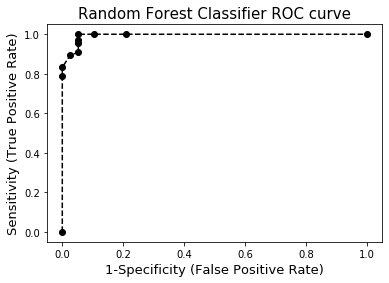

In [53]:
fpr, tpr, thresh = metrics.roc_curve(y_test, pd.Series(y_pred_proba[:,1]))
plt.plot(fpr,tpr,label="Random Forest Classifier", color='k', linestyle='--', marker='o',
     markerfacecolor='k', markersize=6)

plt.xlabel('1-Specificity (False Positive Rate)', fontsize=13)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=13)
plt.title('Random Forest Classifier ROC curve', fontsize=15)
plt.show()

In [54]:
results = ['Random Forest Classifier', round(100*accuracy, 2), round(100*precision, 2), round(100*recall, 2), round(100*f1, 2)]
results = pd.Series(results, index = results_df.columns)
results_df = results_df.append(results, ignore_index=True)

## XGBoost

In [55]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[23:16:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sona\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [57]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [58]:
proba_df['XGBoost'] = pd.Series(y_pred_proba[:,1])

In [59]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Model Performance: XGBoost \nAccuracy: %.2f' % round(100*accuracy,2) + '%')
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % round(100*precision, 2) + '%')
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %.2f' % round(100*recall, 2) + '%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %.2f' % round(100*f1, 2) + '%')
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Model Performance: XGBoost 
Accuracy: 96.15%
Precision: 96.97%
Recall: 96.97%
F1 score: 96.97%
[[36  2]
 [ 2 64]]


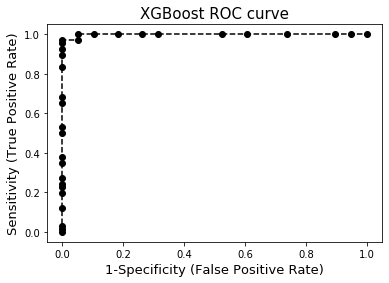

In [60]:
fpr, tpr, thresh = metrics.roc_curve(y_test, pd.Series(y_pred_proba[:,1]))
plt.plot(fpr,tpr,label="XGBoost", color='k', linestyle='--', marker='o',
     markerfacecolor='k', markersize=6)

plt.xlabel('1-Specificity (False Positive Rate)', fontsize=13)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=13)
plt.title('XGBoost ROC curve', fontsize=15)
plt.show()

In [61]:
results = ['XGBoost', round(100*accuracy, 2), round(100*precision, 2), round(100*recall, 2), round(100*f1, 2)]
results = pd.Series(results, index = results_df.columns)
results_df = results_df.append(results, ignore_index=True)

Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[0:,:] = sc.fit_transform(X_train[0:,:])
X_test[0:,:] = sc.transform(X_test[0:,:])

In [63]:
print(X_train)

[[-1  0 -1 ...  0  0  0]
 [ 0  1  1 ...  1  0  0]
 [ 1  1  1 ...  0  1  0]
 ...
 [ 1  1 -1 ...  0  0  0]
 [-1  0 -1 ...  0  0  0]
 [ 1  0  1 ...  1  1  2]]


In [64]:
print(X_test)

[[ 0  0 -1 ...  0  0  0]
 [ 0  0 -1 ...  0  1  0]
 [ 0  0 -1 ...  1  1  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [-1  0  1 ...  0  1  0]
 [ 0  0  1 ...  1  0  0]]


## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [67]:
proba_df['Logistic Regression'] = pd.Series(y_pred_proba[:,1])

In [68]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Model Performance: Logistic Regression \nAccuracy: %.2f' % round(100*accuracy,2) + '%')
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % round(100*precision, 2) + '%')
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %.2f' % round(100*recall, 2) + '%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %.2f' % round(100*f1, 2) + '%')
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Model Performance: Logistic Regression 
Accuracy: 93.27%
Precision: 95.38%
Recall: 93.94%
F1 score: 94.66%
[[35  3]
 [ 4 62]]


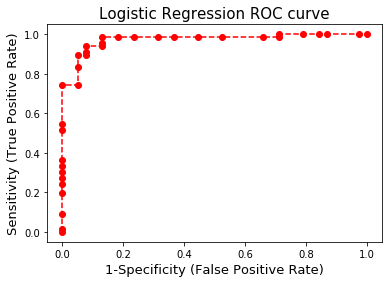

In [69]:
fpr, tpr, thresh = metrics.roc_curve(y_test, pd.Series(y_pred_proba[:,1]))
plt.plot(fpr,tpr,label="Logistic Regression", color='r', linestyle='--', marker='o',
     markerfacecolor='r', markersize=6)

plt.xlabel('1-Specificity (False Positive Rate)', fontsize=13)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=13)
plt.title('Logistic Regression ROC curve', fontsize=15)
plt.show()

In [70]:
results = ['Logistic Regression', round(100*accuracy, 2), round(100*precision, 2), round(100*recall, 2), round(100*f1, 2)]
results = pd.Series(results, index = results_df.columns)
results_df = results_df.append(results, ignore_index=True)

## K-Nearest Neighbors (K-NN)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True])

In [73]:
proba_df['K-Nearest Neighbors (K-NN)'] = pd.Series(y_pred_proba[:,1])

In [74]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Model Performance: K-Nearest Neighbors (K-NN) \nAccuracy: %.2f' % round(100*accuracy,2) + '%')
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % round(100*precision, 2) + '%')
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %.2f' % round(100*recall, 2) + '%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %.2f' % round(100*f1, 2) + '%')
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Model Performance: K-Nearest Neighbors (K-NN) 
Accuracy: 88.46%
Precision: 100.00%
Recall: 81.82%
F1 score: 90.00%
[[38  0]
 [12 54]]


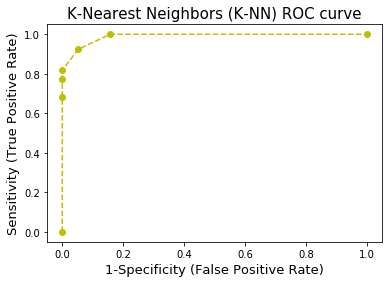

In [75]:
fpr, tpr, thresh = metrics.roc_curve(y_test, pd.Series(y_pred_proba[:,1]))
plt.plot(fpr,tpr,label="K-Nearest Neighbors (K-NN)", color='y', linestyle='--', marker='o',
     markerfacecolor='y', markersize=6)
plt.xlabel('1-Specificity (False Positive Rate)', fontsize=13)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=13)
plt.title('K-Nearest Neighbors (K-NN) ROC curve', fontsize=15)
plt.show()

In [76]:
results = ['K-Nearest Neighbors (K-NN)', round(100*accuracy, 2), round(100*precision, 2), round(100*recall, 2), round(100*f1, 2)]
results = pd.Series(results, index = results_df.columns)
results_df = results_df.append(results, ignore_index=True)

## Support Vector Machine (SVM)

In [77]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', probability=True, random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [78]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [79]:
proba_df['Support Vector Machine (SVM)'] = pd.Series(y_pred_proba[:,1])

In [80]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Model Performance: Support Vector Machine (SVM) \nAccuracy: %.2f' % round(100*accuracy,2) + '%')
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % round(100*precision, 2) + '%')
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %.2f' % round(100*recall, 2) + '%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %.2f' % round(100*f1, 2) + '%')
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Model Performance: Support Vector Machine (SVM) 
Accuracy: 92.31%
Precision: 95.31%
Recall: 92.42%
F1 score: 93.85%
[[35  3]
 [ 5 61]]


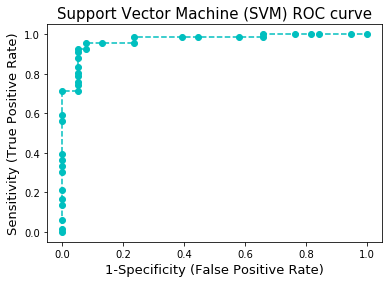

In [81]:
fpr, tpr, thresh = metrics.roc_curve(y_test, pd.Series(y_pred_proba[:,1]))
plt.plot(fpr,tpr,label="Support Vector Machine (SVM)", color='c', linestyle='--', marker='o',
     markerfacecolor='c', markersize=6)
plt.xlabel('1-Specificity (False Positive Rate)', fontsize=13)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=13)
plt.title('Support Vector Machine (SVM) ROC curve', fontsize=15)
plt.show()

In [82]:
results = ['Support Vector Machine (SVM)', round(100*accuracy, 2), round(100*precision, 2), round(100*recall, 2), round(100*f1, 2)]
results = pd.Series(results, index = results_df.columns)
results_df = results_df.append(results, ignore_index=True)

## Kernel SVM

In [83]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', probability=True, random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [84]:
y_pred_ksvm = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [85]:
proba_df['Kernel (SVM)'] = pd.Series(y_pred_proba[:,1])

In [86]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Model Performance: Kernel (SVM) \nAccuracy: %.2f' % round(100*accuracy,2) + '%')
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % round(100*precision, 2) + '%')
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %.2f' % round(100*recall, 2) + '%')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %.2f' % round(100*f1, 2) + '%')
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Model Performance: Kernel (SVM) 
Accuracy: 92.31%
Precision: 95.31%
Recall: 92.42%
F1 score: 93.85%
[[35  3]
 [ 5 61]]


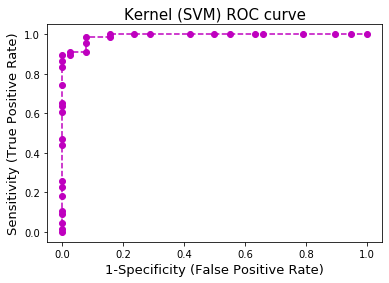

In [87]:
fpr, tpr, thresh = metrics.roc_curve(y_test, pd.Series(y_pred_proba[:,1]))
plt.plot(fpr,tpr,label="Kernel (SVM)", color='m', linestyle='--', marker='o',
     markerfacecolor='m', markersize=6)

plt.xlabel('1-Specificity (False Positive Rate)', fontsize=13)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=13)
plt.title('Kernel (SVM) ROC curve', fontsize=15)
plt.show()

In [88]:
results = ['Kernel (SVM)', round(100*accuracy, 2), round(100*precision, 2), round(100*recall, 2), round(100*f1, 2)]
results = pd.Series(results, index = results_df.columns)
results_df = results_df.append(results, ignore_index=True)

In [89]:
results_df = results_df.sort_values('Accuracy %', ascending=False)

# Model Comparison

In [90]:
cm = sns.color_palette("Spectral", as_cmap=True)
format_dict = {'Accuracy %': '{0:,.2f}', 'Precision %': '{0:,.2f}', 'Recall %': '{0:,.2f}', 'F1 score %': '{0:,.2f}'}
s = results_df.style.format(format_dict).background_gradient(subset=['Accuracy %', 'Precision %', 'Recall %', 'F1 score %'], cmap=cm).hide_index()
s

The best algorithm the XGBoost with an accuracy of 96.15% and 96.97% recall.